<a href="https://colab.research.google.com/github/sahealthsolutions/machinelearningpython/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install Libraries

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

Importing All Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report


Upload DataSet

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Amazon_Customer_Purchase_Data.xlsx to Amazon_Customer_Purchase_Data.xlsx


Load Dataset

In [8]:
df = pd.read_excel(list(uploaded.keys())[0])
df.head()

,Customer_ID,Customer_Name,Age,Gender,Location,Product_Category,Product_ID,Purchase_Date,Purchase_Amount,Payment_Method,Rating,Feedback_Comments,Customer_Lifetime_Value,Loyalty_Score,Discount_Applied,Return_Status,Customer_Segment,Preferred_Shopping_Channel
0,17270,John,56.0,Other,New York,Books,674,2020-01-01 00:00:00,491.643012,Cash,NaN,NaN,3673.712747,60,No,No,Regular,In-store
1,10860,Eve,33.0,Other,Houston,Home Appliances,393,2020-01-01 01:00:00,144.326722,Cash,5.0,Good,2103.060388,29,Yes,Yes,New,In-store
2,15390,John,50.0,Female,Houston,Clothing,995,2020-01-01 02:00:00,109.301892,Bank Transfer,NaN,NaN,899.115059,92,No,No,VIP,Online
3,15191,Eve,66.0,Other,San Francisco,Electronics,405,2020-01-01 03:00:00,226.655516,Bank Transfer,2.0,Excellent,2591.137716,62,Yes,Yes,Regular,Online
4,15734,Eve,38.0,Female,New York,Toys,353,2020-01-01 04:00:00,37.851880,Bank Transfer,2.0,NaN,548.620397,80,No,Yes,Regular,Both


Basic DataCheck

In [10]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Customer_ID                 2000 non-null   int64         
 1   Customer_Name               1900 non-null   object        
 2   Age                         1900 non-null   float64       
 3   Gender                      2000 non-null   object        
 4   Location                    2000 non-null   object        
 5   Product_Category            2000 non-null   object        
 6   Product_ID                  2000 non-null   int64         
 7   Purchase_Date               2000 non-null   datetime64[ns]
 8   Purchase_Amount             1800 non-null   float64       
 9   Payment_Method              2000 non-null   object        
 10  Rating                      1860 non-null   float64       
 11  Feedback_Comments           1099 non-null   object      

,0
Customer_ID,0
Customer_Name,100
Age,100
Gender,0
Location,0
Product_Category,0
Product_ID,0
Purchase_Date,0
Purchase_Amount,200
Payment_Method,0


Data Cleaning: Handle MIssing values

In [11]:
df.fillna(df.median(numeric_only=True), inplace=True)

for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()


/tmp/ipython-input-2117530727.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,0
Customer_ID,0
Customer_Name,0
Age,0
Gender,0
Location,0
Product_Category,0
Product_ID,0
Purchase_Date,0
Purchase_Amount,0
Payment_Method,0


Remove Duplicates

In [12]:
df.drop_duplicates(inplace=True)


Convert Date Column If Exists

In [13]:
if 'Purchase_Date' in df.columns:
    df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])


Create Loyality Score

In [15]:
if 'Total_Purchases' in df.columns and 'Purchase_Frequency' in df.columns:
    df['Loyalty_Score'] = df['Total_Purchases'] * df['Purchase_Frequency']
else:
    df['Loyalty_Score'] = np.random.randint(1,100,size=len(df))


Categorical Columns

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])


Select features for clustering

In [19]:
from sklearn import cluster
cluster_features = []

for col in ['Purchase_Amount','Total_Orders','Loyalty_Score']:
    if col in df.columns:
        cluster_features.append(col)

cluster_data = df[cluster_features]
cluster_data.head()


,Purchase_Amount,Loyalty_Score
0,491.643012,48
1,144.326722,37
2,109.301892,1
3,226.655516,78
4,37.851880,48


Scale Data


In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)


Kmeans


In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

df[['Cluster']].head()


,Cluster
0,2
1,0
2,0
3,1
4,0


CLV Prediction Linear Regression Data Preparation


In [28]:
# Target
y = df['CLV']

# Features (drop target)
X = df.drop(columns=['CLV'])

# 1) If Purchase_Date exists, drop it OR convert it (see next fix below)
datetime_cols = X.select_dtypes(include=['datetime64[ns]', 'datetime64']).columns
X = X.drop(columns=datetime_cols)

# 2) Also make sure all remaining columns are numeric
# (If you still have object columns, encode them)
X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Train Model


In [29]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

predictions = lr_model.predict(X_test)


Evaluate Model

In [30]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 65487.44672984396
R2 Score: -0.015555513603256355


CHURN Prediction Logistics Regression

In [33]:
if 'Churn' not in df.columns:
    df['Churn'] = np.random.randint(0,2,size=len(df))

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)

churn_pred = log_model.predict(X_test)
print(classification_report(y_test,churn_pred))


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int64DType'>)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Ensure Churn exists
if 'Churn' not in df.columns:
    df['Churn'] = np.random.randint(0, 2, size=len(df))

# Separate features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# DROP datetime columns
datetime_cols = X.select_dtypes(include=['datetime64[ns]', 'datetime64']).columns
X = X.drop(columns=datetime_cols)

# ENCODE categorical columns
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
churn_pred = log_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, churn_pred))
print(classification_report(y_test, churn_pred))


Accuracy: 0.475
              precision    recall  f1-score   support

           0       0.47      0.54      0.50       198
           1       0.48      0.42      0.44       202

    accuracy                           0.47       400
   macro avg       0.48      0.48      0.47       400
weighted avg       0.48      0.47      0.47       400



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Visualization

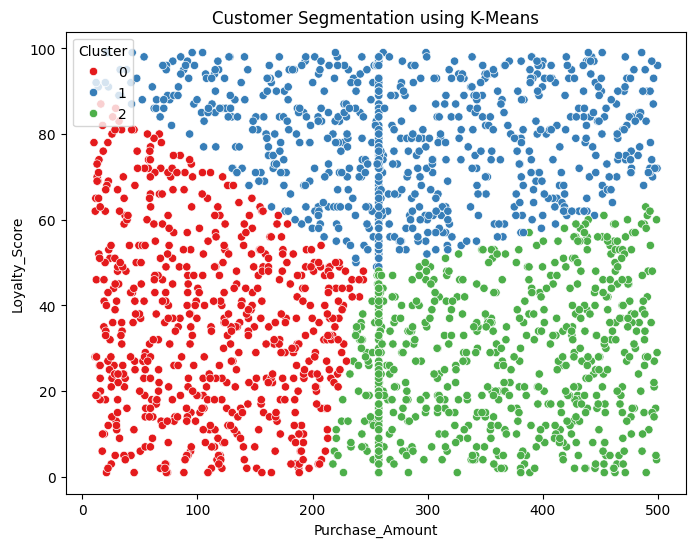

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

if len(cluster_features) >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df,
        x=cluster_features[0],
        y=cluster_features[1],
        hue='Cluster',
        palette='Set1'
    )
    plt.title("Customer Segmentation using K-Means")
    plt.show()



In [38]:
#testing
print(cluster_features)
print(df.columns)


['Purchase_Amount', 'Loyalty_Score']
Index(['Customer_ID', 'Customer_Name', 'Age', 'Gender', 'Location',
       'Product_Category', 'Product_ID', 'Purchase_Date', 'Purchase_Amount',
       'Payment_Method', 'Rating', 'Feedback_Comments',
       'Customer_Lifetime_Value', 'Loyalty_Score', 'Discount_Applied',
       'Return_Status', 'Customer_Segment', 'Preferred_Shopping_Channel',
       'Cluster', 'CLV', 'Churn'],
      dtype='object')


churn count plot


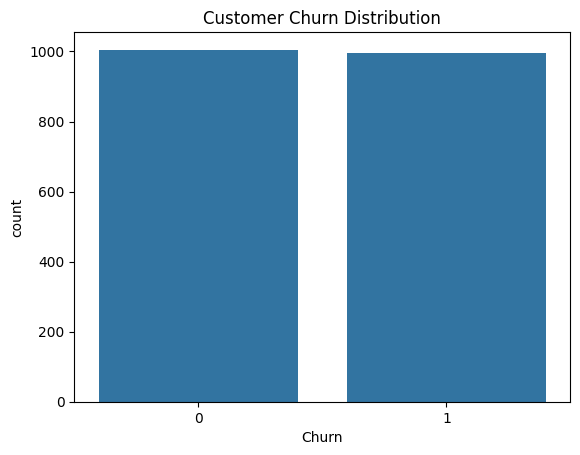

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()
